# Laptop Price Prediction
    Predicting laptop prices is a valuable tool for buyers, sellers, and dealerships. This model uses machine learning techniques to estimate the price of a laptop based on various features such as brand, processor brand, ram size, storage capacity, grapgic card etc. By analyzing historical data, the model can make accurate predictions, helping users make informed decisions in the market.

In [1]:
import warnings
warnings.filterwarnings('ignore')
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

### Load Data File
    First step is to load data file containing data of laptops on which model will be designed later.

In [2]:
# Load Data File
df = pd.read_csv("laptopPrice.csv")

In [3]:
df.shape

(823, 19)

#### Explore Data File

In [4]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [6]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

#### Duplicate rows
    Duplicate rows are not desireable in any dataset so now find and delete if any duplicate row is there in dataset.

In [7]:
print("No of duplicate Rows = ",df.duplicated().sum())

No of duplicate Rows =  21


In [8]:
df.drop_duplicates(inplace=True)
print("No of duplicate Rows = ",df.duplicated().sum())
df.shape

No of duplicate Rows =  0


(802, 19)

In [9]:
df.reset_index(inplace=True)

In [10]:
df

,index,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
798,819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
799,820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
800,821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [11]:
df.drop(columns=['index'],inplace=True)
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
798,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
799,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
800,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


#### Data Processing

In [12]:
df['brand'].unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

In [13]:
df['processor_brand'].unique()

array(['Intel', 'AMD', 'M1'], dtype=object)

In [14]:
df['ram_gb'] = df['ram_gb'].str.replace("GB", "")

In [15]:
df['ram_gb'] = df['ram_gb'].astype('int32')

In [16]:
df['ssd'] = df['ssd'].str.replace("GB", "")
df['ssd'] = df['ssd'].astype('int32')
df['hdd'] = df['hdd'].str.replace("GB", "")
df['hdd'] = df['hdd'].astype('int32')
df['graphic_card_gb'] = df['graphic_card_gb'].str.replace("GB", "")
df['graphic_card_gb'] = df['graphic_card_gb'].astype('int32')

In [17]:
df


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64-bit,0,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64-bit,0,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64-bit,0,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,32-bit,2,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64-bit,0,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64-bit,0,Casual,1 year,No,No,135990,3 stars,0,0
798,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64-bit,0,Casual,1 year,No,No,144990,3 stars,0,0
799,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64-bit,4,Casual,1 year,No,No,149990,3 stars,0,0
800,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64-bit,4,Casual,1 year,No,No,142990,3 stars,0,0


 In our dataset there are data of 8 different brands of laptops.
 Now we check which brand has maximum sale by showing grapg.

<Axes: xlabel='No of laptops sale', ylabel='brand'>

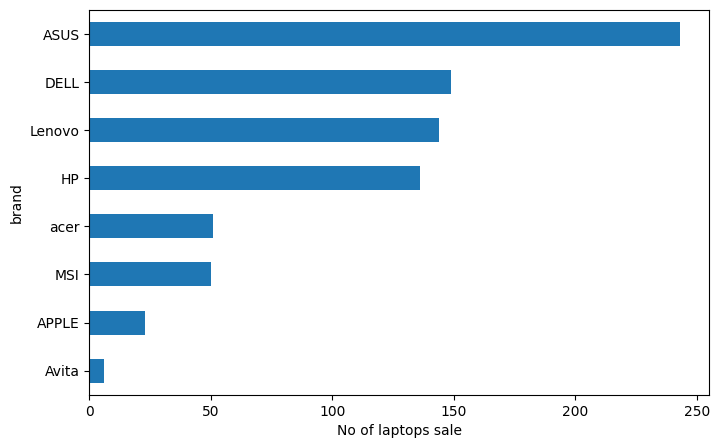

In [18]:
df['brand'].value_counts().sort_values().plot(kind='barh',figsize=(8,5),xlabel='No of laptops sale')

As graph shows ASUS brand has maximum number of sales.
Now check which brand has higher prices .

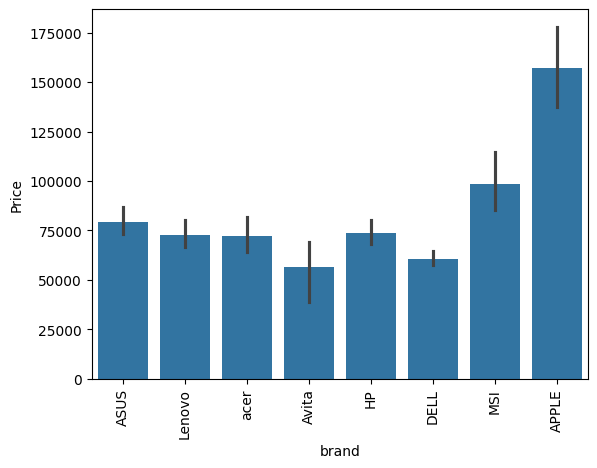

In [19]:
sns.barplot(x=df['brand'], y=df['Price'])

plt.xticks(rotation="vertical")

plt.show()

APPLE brand laptops are more expensive than other brands may be that is the reason it has lower number of sales as shown in previous graph.


    Now we want to see effect of price on sale rate. for this make a histogram of 'Price' column.Histogram will show laptop sale density with respect to price.

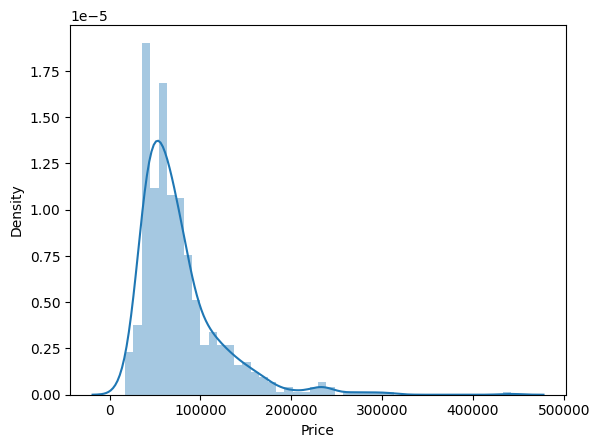

In [20]:
sns.distplot(df['Price'])
plt.show()

    Above histogram shows more density where price is lower that means number of laptops sales increases as price is low as price increases number of sales of laptop decreases.thats why this histogram is skewed around lower prices of laptop.

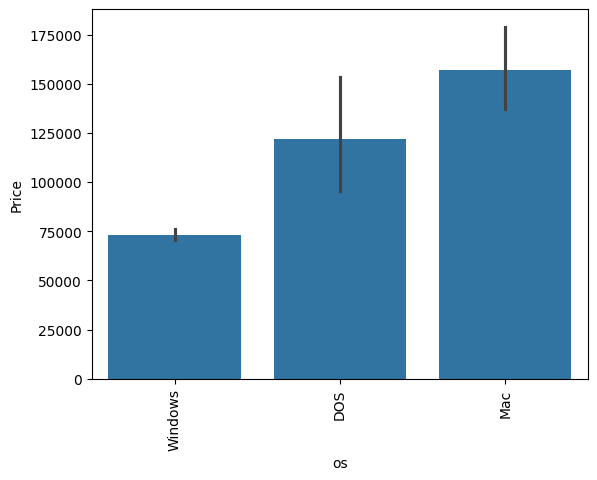

In [21]:
# Effect of operating system on laptop price
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

###### Transforming Data
    Machine learning models best perform on Numerical data so before designing model data should be in appropriate form so that model best fit on it. For this data is transformed into appropriate form.

In [22]:
data = df.dropna()

In [23]:
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
   

In [24]:
df


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64-bit,0,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64-bit,0,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64-bit,0,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,32-bit,2,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64-bit,0,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64-bit,0,Casual,1 year,No,No,135990,3 stars,0,0
798,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64-bit,0,Casual,1 year,No,No,144990,3 stars,0,0
799,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64-bit,4,Casual,1 year,No,No,149990,3 stars,0,0
800,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64-bit,4,Casual,1 year,No,No,142990,3 stars,0,0


In [25]:
data

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,4,1,0,1024,2,1,0,0,3,0,0,34649,1,3,0
1,5,1,1,0,4,1,0,1024,2,1,0,0,3,0,0,38999,2,65,5
2,5,1,1,0,4,1,0,1024,2,1,0,0,3,0,0,39999,2,8,1
3,1,1,2,0,8,1,512,0,2,0,2,0,3,0,0,69990,2,0,0
4,1,1,0,7,4,1,0,512,2,1,0,0,3,0,0,26990,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1,0,10,7,4,1,1024,0,2,1,0,0,0,0,0,135990,2,0,0
798,1,0,10,7,4,1,1024,0,2,1,0,0,0,0,0,144990,2,0,0
799,1,0,10,7,4,1,1024,0,2,1,4,0,0,0,0,149990,2,0,0
800,1,0,10,7,4,1,1024,0,2,1,4,0,0,0,0,142990,2,0,0


In [58]:
df['warranty'].unique()


array(['No warranty', '1 year', '2 years', '3 years'], dtype=object)

In [59]:
data['warranty'].unique()

array([3, 0, 1, 2])

In [29]:
data['graphic_card_gb'].unique()

array([0, 2, 4, 6, 8], dtype=int32)

##### Feature Extraction
    Extracting features(inputs and outputs) from data is important as it is required for modeel to be designed.
    x contain inputs
    y contain outputs

In [30]:

x = data.drop('Price', axis=1)  # Assuming 'Price' is the target column
y = data['Price']

    Now split input and output into train and test dataset.

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Designing
    After creating train and test datasets model is designed on these sets.
    first make simple linear regression model and evaluate its performance.

In [32]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(x_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MAE: 17087.941986435635
R2 Score: 0.6465583627464444


    Now we make different Regression models and evaluate there performance to find best model for our data.

In [34]:
lnrr=LinearRegression()
ridge=Ridge(alpha=1.0)
lasso=Lasso(alpha=1.0)
elastic=ElasticNet(alpha=1.0, l1_ratio=0.5)
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
xgr=XGBRegressor()

In [35]:
clfs = {
    'Linear Regression': lnrr,
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Elastic Net Regression': elastic,
    'Decision Tree Regression': dtr,
    'Random Forest': rfr,
    'Gradient Boosting': gbr,
    'XGB Regression': xgr
}

In [36]:
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    R2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return R2 , rmse

#### Evaluation

In [37]:
R2_scores = []
rmse_scores = []
for name , clfs in clfs.items():
    current_R2, current_rmse = train_classifier(clfs, x_train, y_train, x_test, y_test)
    print()
    print("For: ", name)
    print("R2_score : ", current_R2)
    print("rmse_score : ", current_rmse)
    
    R2_scores.append(current_R2)
    rmse_scores.append(current_rmse)


For:  Linear Regression
R2_score :  0.6465583627464444
rmse_score :  27420.15696595046

For:  Ridge Regression
R2_score :  0.6458542349787082
rmse_score :  27447.456646338967

For:  Lasso Regression
R2_score :  0.6465503582410151
rmse_score :  27420.467460710417

For:  Elastic Net Regression
R2_score :  0.5159815590748822
rmse_score :  32087.954681963667

For:  Decision Tree Regression
R2_score :  0.6307287320307106
rmse_score :  28027.46637626941

For:  Random Forest
R2_score :  0.7344564729730155
rmse_score :  23767.250366448297

For:  Gradient Boosting
R2_score :  0.7697197236368299
rmse_score :  22132.957618147797

For:  XGB Regression
R2_score :  0.8143348097801208
rmse_score :  19873.590113514972


### Conclusion
    As there are different Regression models are available but every model has different performance.
    Linear regression, Lasso regression, Ridge regression, Elastic regression and Decision tree have low performance.
    While Random forest, Gradient Boosting and XGB regression has fair performance.
    Out of these models XGB Regression gives best results for our problem.

### Final Selected Model
    Fom above results it is clear that XGB Regressor is best for given dataset so next we use this to design final model and export this model to make a web app which uses this model to predict price of a laptop given its specification.
   - first step is to make our model for that save model in final_model
   - train that model
   - give an input to check weather model is working or not
   - export model using pickle
   - make app using streamlit
    

In [38]:
final_model=XGBRegressor()
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MAE: 12348.0
R2 Score: 0.8143348097801208


In [39]:
x_train.head(1)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating,Number of Ratings,Number of Reviews
432,1,1,2,1,8,1,256,1024,2,0,0,0,0,0,1,3,1188,127


In [40]:
array = np.array([1,1,2,1,8,1,256,1024,2,0,0,0,0,0,1,3,1188,127])
query = array.reshape(1,18)


In [41]:
predict=final_model.predict(query)[0]
predict

np.float32(50990.926)

##### Save Model
Save model using pickle

In [42]:
import pickle as pk
df.to_csv("df.csv", index=False)
pk.dump(final_model,open('model.pkl','wb'))

### Refrences
1. https://github.com/Rishabhrv/Laptop-Price-Predictor/blob/main/Laptop%20Price%20Predictor.ipynb
2. https://www.analyticsvidhya.com/blog/2021/11/laptop-price-prediction-practical-understanding-of-machine-learning-project-lifecycle/
3. https://www.kaggle.com/datasets/jacksondivakarr/laptop-price-prediction-dataset
4. https://github.com/Paras-bakshi/Laptop-Price-Predictor
5. https://www.youtube.com/watch?v=BgpM2IiCH6k
6. https://www.youtube.com/watch?v=T7RT9Qecs-E